# 1.IMPORTING LIBRARIES

In [1]:
import re
import string
import unicodedata
import numpy as np

import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter 

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split, ParameterGrid

In [2]:
# Bag-of words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# BOW 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score,f1_score,confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import (LSTM,
                                     Embedding,
                                     BatchNormalization,
                                     Dense,
                                     TimeDistributed,
                                     Dropout,
                                     Bidirectional,
                                     Flatten,
                                     GlobalMaxPool1D)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


# 2.DATA COLLECTION

In [5]:
import zipfile  # Make sure to import the zipfile module
import os
import pandas as pd

# Define the path to the zip file
zip_path = r"C:\Users\binu\Downloads\Intensity_data.zip"
extracted_folder = r"C:\Users\binu\Downloads\Intensity_data"  # Path to extract the contents

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Check the extracted files (optional)
extracted_files = os.listdir(extracted_folder)
print(extracted_files)  # Print the files to check their names

# Load CSV files into DataFrames
happy_df = pd.read_csv(os.path.join(extracted_folder, "happiness.csv"))
angry_df = pd.read_csv(os.path.join(extracted_folder, "angriness.csv"))
sad_df = pd.read_csv(os.path.join(extracted_folder, "sadness.csv"))



['angriness.csv', 'happiness.csv', 'sadness.csv']


In [6]:
# Check the first few rows of each DataFrame to verify
print(happy_df.head())
print(angry_df.head())
print(sad_df.head())


                                             content  intensity
0  Wants to know how the hell I can remember word...  happiness
1  Love is a long sweet dream & marriage is an al...  happiness
2  The world could be amazing when you are slight...  happiness
3  My secret talent is getting tired without doin...  happiness
4  Khatarnaak Whatsapp Status Ever… Can\’t talk, ...  happiness
                                             content  intensity
0  Sometimes I’m not angry, I’m hurt and there’s ...  angriness
1                     Not available for busy people☺  angriness
2  I do not exist to impress the world. I exist t...  angriness
3  Everything is getting expensive except some pe...  angriness
4       My phone screen is brighter than my future 🙁  angriness
                                             content intensity
0  Never hurt people who love you a lot, because ...   sadness
1  Don’t expect me to tell you what you did wrong...   sadness
2  I preferred walking away than fighting f

In [7]:
# Add label columns
happy_df["label"] = "happiness"
angry_df["label"] = "angriness"
sad_df["label"] = "sadness"

In [8]:
# Combine datasets into a single DataFrame
df = pd.concat([happy_df, angry_df, sad_df], ignore_index=True)

# 2.1 intensity mapping

In [9]:
df['intensity'].value_counts()

intensity
happiness    708
angriness    696
sadness      635
Name: count, dtype: int64

In [10]:
intensity_mapping = {
    'happiness': 0,
    'angriness':1,
    "sadness":2
}

df['intensity_enc'] = df['intensity'].map(intensity_mapping)

In [11]:
df.head()

content  intensity      label  \
0  Wants to know how the hell I can remember word...  happiness  happiness   
1  Love is a long sweet dream & marriage is an al...  happiness  happiness   
2  The world could be amazing when you are slight...  happiness  happiness   
3  My secret talent is getting tired without doin...  happiness  happiness   
4  Khatarnaak Whatsapp Status Ever… Can\’t talk, ...  happiness  happiness   

   intensity_enc  
0              0  
1              0  
2              0  
3              0  
4              0

# 3.Exploratory Data Analysis (EDA)

# 3.1 Check Data Structure

In [12]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2039 non-null   object
 1   intensity      2039 non-null   object
 2   label          2039 non-null   object
 3   intensity_enc  2039 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 63.8+ KB
None


In [13]:
# Display first few rows
print(df.head())

                                             content  intensity      label  \
0  Wants to know how the hell I can remember word...  happiness  happiness   
1  Love is a long sweet dream & marriage is an al...  happiness  happiness   
2  The world could be amazing when you are slight...  happiness  happiness   
3  My secret talent is getting tired without doin...  happiness  happiness   
4  Khatarnaak Whatsapp Status Ever… Can\’t talk, ...  happiness  happiness   

   intensity_enc  
0              0  
1              0  
2              0  
3              0  
4              0  


In [14]:
# Shuffle the combined DataFrame to randomize the order
df = df.sample(frac=1).reset_index(drop=True)

# 3.2 Check for Missing Values

In [15]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 content          0
intensity        0
label            0
intensity_enc    0
dtype: int64


# 3.3 Check Class Distribution

In [16]:
print("Class Distribution:\n", df["label"].value_counts())

Class Distribution:
 label
happiness    708
angriness    696
sadness      635
Name: count, dtype: int64


# 3.3.1  Visualize Class Distribution

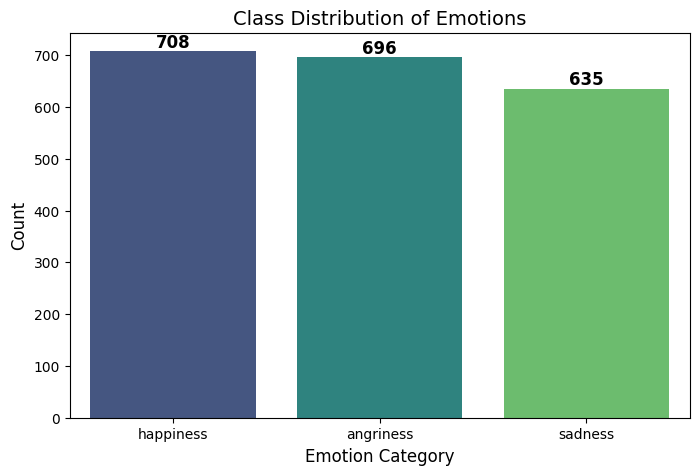

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = df["label"].value_counts()

# Plot with labels
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df["label"], palette="viridis")

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set plot labels
plt.title("Class Distribution of Emotions", fontsize=14)
plt.xlabel("Emotion Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


# 3.4 Detect and Remove Duplicates

In [18]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 447


In [19]:
df[df.duplicated()]

content  intensity      label  \
40    ['You Hurt Me But I Still Love You.', 'True Lo...    sadness    sadness   
41    ['You Hurt Me But I Still Love You.', 'True Lo...    sadness    sadness   
47    ['You Hurt Me But I Still Love You.', 'True Lo...    sadness    sadness   
55    ['You Hurt Me But I Still Love You.', 'True Lo...    sadness    sadness   
63    ['You Hurt Me But I Still Love You.', 'True Lo...    sadness    sadness   
...                                                 ...        ...        ...   
2025  Anger is a feeling that makes your mouth work ...  angriness  angriness   
2030  ['You Hurt Me But I Still Love You.', 'True Lo...    sadness    sadness   
2034  It hurts when you realize you aren't as import...    sadness    sadness   
2035   Never regret something that once made you smile.  angriness  angriness   
2038  ['Hating Me Won’T Make You Pretty.', 'Anger Is...  angriness  angriness   

      intensity_enc  
40                2  
41                2  
47                2  
55                2  
63                2  
...             ...  
2025              1  
2030              2  
2034              2  
2035              1  
2038              1  

[447 rows x 4 columns]

In [20]:
# Remove duplicates
df = df.drop_duplicates()
print("Duplicates removed. New shape:", df.shape)

Duplicates removed. New shape: (1592, 4)


# Content length across intensities

In [21]:
df['content_len'] = df['content'].apply(lambda x: len(x.split(' ')))
df.head()

content  intensity      label  \
0  When you think you're not happy with youe LIFE...  happiness  happiness   
1  Two things a man should never be angry at. Wha...  angriness  angriness   
2  "How Strange!! "Lies don't end relationships, ...    sadness    sadness   
3          Tum mujhe ‘Hmmm’ do, main tumhe ‘K’ dunga  happiness  happiness   
4  Each day is a new beginning, a new chapter to ...  happiness  happiness   

   intensity_enc  content_len  
0              0           19  
1              1           18  
2              2           11  
3              0            8  
4              0           28

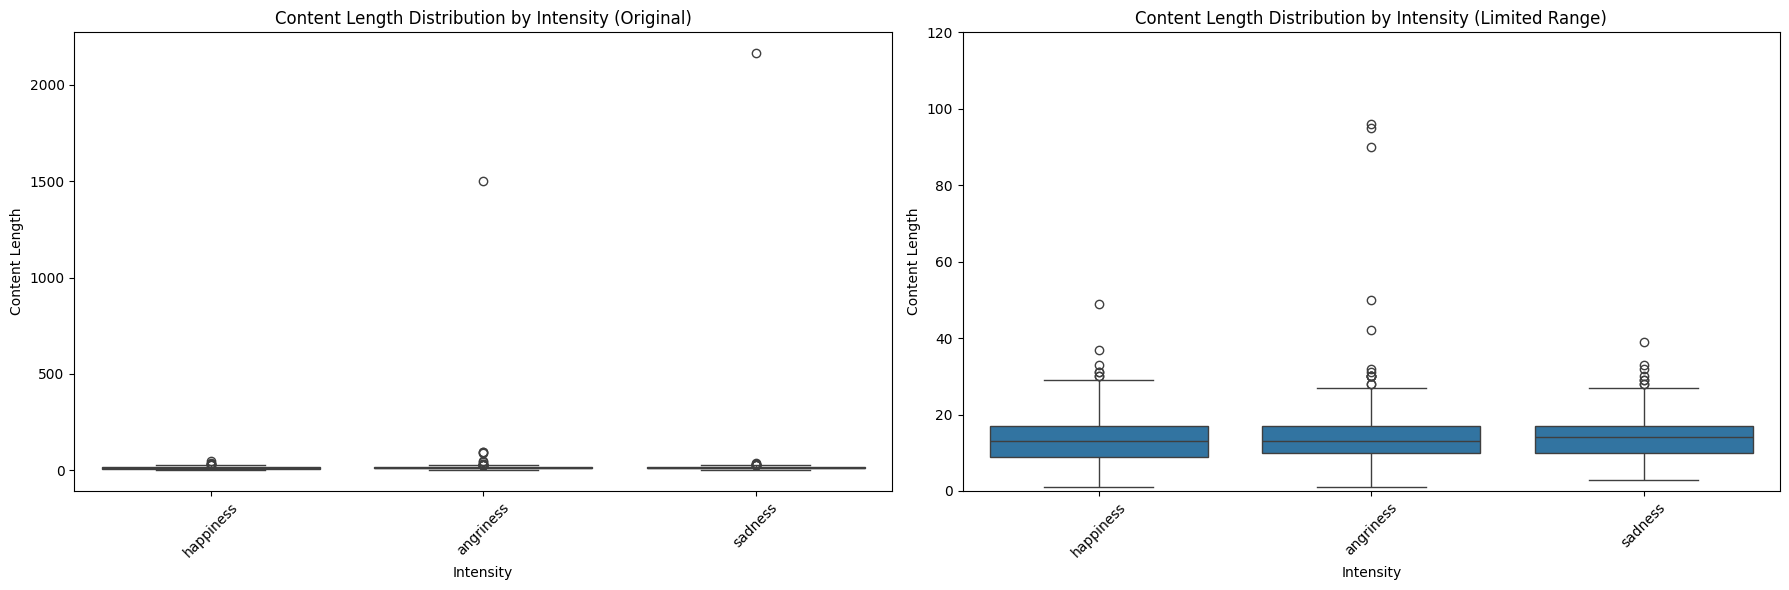

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the original boxplot without setting y-axis limits
sns.boxplot(ax=axes[0], x='intensity', y='content_len', data=df)
axes[0].set_title('Content Length Distribution by Intensity (Original)')
axes[0].set_xlabel('Intensity')
axes[0].set_ylabel('Content Length')
axes[0].tick_params(axis='x', rotation=45)

# Plot the boxplot with y-axis limits
sns.boxplot(ax=axes[1], x='intensity', y='content_len', data=df)
axes[1].set_title('Content Length Distribution by Intensity (Limited Range)')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('Content Length')
axes[1].set_ylim(0, 120)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

# 4.Data Preprocessing

In [24]:
# Download necessary NLTK resources  
nltk.download('punkt')  
nltk.download('stopwords')  
nltk.download('wordnet')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\binu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\binu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\binu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 4.1 TEXT NORMALIZATION

# 4.1.1 Text Cleaning  

In [25]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply text cleaning to the 'content' column
df['content'] = df['content'].apply(clean_text)
print("✅ Text Cleaning Done!")

✅ Text Cleaning Done!


# 4.1.2 Converting to Lowercase

In [26]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


# 4.1.3 Removal of Whitespaces

In [27]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


# 4.1.4  Removal of Punctuations

In [28]:
import string

def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")  # Optionally exclude apostrophes to retain contractions
    return text.translate(str.maketrans("", "", punct_str))

# Example usage
text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))


Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


# 4.1.5 Removal of Unicode Characters

In [29]:
# Removing HTML tags
import re

def remove_html(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'', text)

# Example usage
text = ' <a href = "https://www.kaggle.com/code/vishalnaik/intensity-classification"> Intensity classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input:  <a href = "https://www.kaggle.com/code/vishalnaik/intensity-classification"> Intensity classification </a>
Output:   Intensity classification 


In [30]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [31]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


In [32]:
import unicodedata
import re

def remove_problematic(text):
    # Replace non-ASCII characters with an apostrophe
    text = re.sub(r'[^\x00-\x7F]+', "'", text)
    
    # Normalize and encode to remove any remaining non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    
    # Remove any double spaces that may have been introduced
    text = re.sub(' +', ' ', text)
    
    return text

# Example usage
text = "it's â function thatâ makes canât removesâ€™ iâ€™m ðŸ™"
print("Input: {}".format(text))
print("Output: {}".format(remove_problematic(text)))


Input: it's â function thatâ makes canât removesâ€™ iâ€™m ðŸ™
Output: it's ' function that' makes can't removes' i'm '


# 4.1.6 Substitution of Acronyms


In [33]:
acronyms_dict = {
    "aka": "also known as",
    "asap": "as soon as possible",
    "brb": "be right back",
    "btw": "by the way",
    "dob": "date of birth",
    "faq": "frequently asked questions",
    "fyi": "for your information",
    "idk": "i don't know",
    "idc": "i don't care",
    "iirc": "if i recall correctly",
    "imo": "in my opinion",
    "irl": "in real life",
    "lmk": "let me know",
    "lol": "laugh out loud",
    "ngl": "not gonna lie",
    "noyb": "none of your business",
    "nvm": "never mind",
    "ofc": "of course",
    "omg": "oh my god",
    "pfa": "please find attached",
    "rofl": "rolling on the floor laughing",
    "stfu": "shut the fuck up",
    "tba": "to be announced",
    "tbc": "to be continued",
    "tbd": "to be determined",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "wtf": "what the fuck",
    "wth": "what the heck"
}
print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [34]:
import re

# Example acronyms dictionary
acronyms_dict = {
    "btw": "by the way",
    "dob": "date of birth",
    # Add more acronyms as needed
}

def convert_acronyms(text):
    words = []
    # Tokenize the text using re.findall to capture words and apostrophes
    for word in re.findall(r"\b\w+(?:'\w+)?\b", text):
        # If the word is an acronym, replace it with its expanded form
        if word.lower() in acronyms_dict:
            words.extend(acronyms_dict[word.lower()].split())
        else:
            words.append(word)
    return ' '.join(words)

# Example usage
text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))


Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


# 4.1.7 Substitution of Contractions

In [35]:
contractions_dict = {
    "'aight": "alright",
    "ain't": "are not",
    "amn't": "am not",
    "arencha": "are not you",
    "aren't": "are not",
    "'bout": "about",
    "can't": "cannot",
    "cap'n": "captain",
    "'cause": "because",
    "'cept": "except",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "dammit": "damn it",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "doesn't": "does not",
    "doin'": "doing",
    "don't": "do not",
    "dunno": "do not know",
    "d'ye": "do you",
    "e'en": "even",
    "e'er": "ever",
    "'em": "them",
    "everybody's": "everybody is",
    "everyone's": "everyone is",
    "fo'c'sle": "forecastle",
    "finna": "fixing to",
    "'gainst": "against",
    "g'day": "good day",
    "gimme": "give me",
    "giv'n": "given",
    "gonna": "going to",
    "gon't": "go not",
    "gotcha": "got you",
    "gotta": "got to",
    "gtg": "got to go",
    "hadn't": "had not",
    "had've": "had have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'll": "he shall",
    "helluva": "hell of a",
    "he's": "he is",
    "here's": "here is",
    "he've": "he have",
    "how'd": "how would",
    "howdy": "how do you do",
    "how'll": "how will",
    "how're": "how are",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i shall",
    "i'm": "i am",
    "imma": "i am about to",
    "i'm'a": "i am about to",
    "i'm'o": "i am going to",
    "innit": "is it not",
    "ion": "i do not",
    "i've": "i have",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i shall",
    "i'm": "i am",
    "i'm'a": "i am about to",
    "i'm'o": "i am going to",
    "innit": "is it not",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it shall",
    "it's": "it is",
    "iunno": "i do not know",
    "kinda": "kind of",
    "let's": "let us",
    "li'l": "little",
    "ma'am": "madam",
    "mayn't": "may not",
    "may've": "may have",
    "methinks": "me thinks",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "must've": "must have",
    "'neath": "beneath",
    "needn't": "need not",
    "nal": "and all",
    "ne'er": "never",
    "o'clock": "of the clock",
    "o'er": "over",
    "ol'": "old",
    "oughtn't": "ought not",
    "'round": "around",
    "'s": "is",
    "shalln't": "shall not",
    "shan't": "shall not",
    "she'd": "she had",
    "she'll": "she shall",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "somebody's": "somebody is",
    "someone's": "someone is",
    "something's": "something is",
    "so're": "so are",
    "so's": "so is",
    "so've": "so have",
    "that'll": "that shall",
    "that're": "that are",
    "that's": "that is",
    "that'd": "that would",
    "there'd": "there had",
    "there'll": "there shall",
    "there're": "there are",
    "there's": "there is",
    "these're": "these are",
    "these've": "these have",
    "they'd": "they had",
    "they'll": "they shall",
    "they're": "they are",
    "they've": "they have",
    "this's": "this is",
    "those're": "those are",
    "those've": "those have",
    "'thout": "without",
    "'til": "until",
    "'tis": "it is",
    "to've": "to have",
    "'twas": "it was",
    "'tween": "between",
    "'twhere": "it were",
    "wanna": "want to",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we shall",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "whatcha": "what are you",
    "what'd": "what did",
    "what'll": "what shall",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where'd": "where did",
    "where'll": "where shall",
    "where're": "where are",
    "where's": "where is",
    "where've": "where have",
    "which'd": "which had",
    "which'll": "which shall",
    "which're": "which are",
    "which's": "which is",
    "which've": "which have",
    "who'd": "who would",
    "who'd've": "who would have",
    "who'll": "who shall",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "why'd": "why did",
    "why're": "why are",
    "why's": "why is",
    "willn't": "will not",
    "won't": "will not",
    "wonnot": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd've": "you all would have",
    "y'all'd'n't've": "you all would not have",
    "y'all're": "you all are",
    "y'all'ren't": "you all are not",
    "y'at": "you at",
    "yes'm": "yes madam",
    "yessir": "yes sir",
    "you'd": "you had",
    "you'll": "you shall",
    "you're": "you are",
    "you've": "you have",
    "aight": "alright",
    "aint": "are not",
    "amnt": "am not",
    "arent": "are not",
    "cant": "cannot",
    "cause": "because",
    "couldve": "could have",
    "couldnt": "could not",
    "couldntve": "could not have",
    "darent": "dare not",
    "daresnt": "dare not",
    "dasnt": "dare not",
    "didnt": "did not",
    "doesnt": "does not",
    "doin": "doing",
    "dont": "do not",
    "eer": "ever",
    "everybodys": "everybody is",
    "everyones": "everyone is",
    "finna": "fixing to",
    "gday": "good day",
    "givn": "given",
    "gont": "go not",
    "hadnt": "had not",
    "hadve": "had have",
    "hasnt": "has not",
    "havent": "have not",
    "hed": "he had",
    "hell": "he shall",
    "hes": "he is",
    "heve": "he have",
    "howd": "how did",
    "howdy": "how do you do",
    "howll": "how will",
    "howre": "how are",
    "hows": "how is",
    "idve": "i would have",
    "ill": "i shall",
    "im": "i am",
    "ima": "i am about to",
    "imo": "i am going to",
    "innit": "is it not",
    "ive": "i have",
    "isnt": "is not",
    "itd": "it would",
    "itll": "it shall",
    "its": "it is",
    "lets": "let us",
    "lil": "little",
    "maam": "madam",
    "maynt": "may not",
    "mayve": "may have",
    "methinks": "me thinks",
    "mightnt": "might not",
    "mightve": "might have",
    "mustnt": "must not",
    "mustntve": "must not have",
    "mustve": "must have",
    "neednt": "need not",
    "neer": "never",
    "oclock": "of the clock",
    "oer": "over",
    "ol": "old",
    "oughtnt": "ought not",
    "shallnt": "shall not",
    "shant": "shall not",
    "shed": "she had",
    "shell": "she shall",
    "shes": "she is",
    "shouldve": "should have",
    "shouldnt": "should not",
    "shouldntve": "should not have",
    "somebodys": "somebody is",
    "someones": "someone is",
    "somethings": "something is",
    "thatll": "that shall",
    "thatre": "that are",
    "thatd": "that would",
    "thered": "there had",
    "therell": "there shall",
    "therere": "there are",
    "theres": "there is",
    "thesere": "these are",
    "theseve": "these have",
    "theyd": "they had",
    "theyll": "they shall",
    "theyre": "they are",
    "theyve": "they have",
    "thiss": "this is",
    "thosere": "those are",
    "thoseve": "those have",
    "tis": "it is",
    "tove": "to have",
    "twas": "it was",
    "wanna": "want to",
    "wasnt": "was not",
    "wed": "we had",
    "wedve": "we would have",
    "were": "we are",
    "weve": "we have",
    "werent": "were not",
    "whatd": "what did",
    "whatll": "what shall",
    "whatre": "what are",
    "whats": "what is",
    "whatve": "what have",
    "whens": "when is",
    "whered": "where did",
    "wherell": "where shall",
    "wherere": "where are",
    "wheres": "where is",
    "whereve": "where have",
    "whichd": "which had",
    "whichll": "which shall",
    "whichre": "which are",
    "whichs": "which is",
    "whichve": "which have",
    "whod": "who would",
    "whodve": "who would have",
    "wholl": "who shall",
    "whore": "who are",
    "whos": "who is",
    "whove": "who have",
    "whyd": "why did",
    "whyre": "why are",
    "whys": "why is",
    "wont": "will not",
    "wouldve": "would have",
    "wouldnt": "would not",
    "wouldntve": "would not have",
    "yall": "you all",
    "yalldve": "you all would have",
    "yallre": "you all are",
    "youd": "you had",
    "youll": "you shall",
    "youre": "you are",
    "youve": "you have",
    "'re": "are",
    "that's": "that is",
    "thats": "that is"
}

In [36]:
# List of contractions
import re

# Example contractions dictionary
contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "i'm": "i am",
    # Add more contractions as needed
}

def convert_contractions(text):
    words = []
    # Tokenize the text using re.findall to capture words and contractions
    for word in re.findall(r"\b\w+(?:'\w+)?\b", text):
        # If the word is a contraction, replace it with its expanded form
        if word.lower() in contractions_dict:
            words.extend(contractions_dict[word.lower()].split())
        else:
            words.append(word)
    return ' '.join(words)

# Example usage
text = "it's function that make can't removes i'm"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))


Input: it's function that make can't removes i'm
Output: it's function that make cannot removes i am


# 4.1.8 Slangs and Abbreviations Handling

In [37]:
abbreviations = {
    "$" : "dollar",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "lol" : "laugh out loud",
    "lit": "exciting",
    "btw":"by the way",
    # Indian slangs
    "namaste" : "hello",
    "Bakchodi" : "senseless talk",
    "chai-pani" : "bribes",
    "jugaad" : "quick, improvised solution to a problem",
    "chillax" : "calm down",
    "funda" : "basic concept",
    "maggi" : "instant noodles; something quick or easy",
    "firangi" : "foreigner",
    "kya" :  "hey",
    "pinne" : "drink",
    "bhai" : "friend",
    "aaj": "today",
    "jaye": "will go",
    "macha" : "close friend",
    "machi" : "close friend",
    "item" : "attractive person",
    "sutta" : "cigarette",
    "thulla" : "policeman",
    "panga" : "getting into a fight",
    "gedi" : "casual drive",
    "lafda" : "trouble",
    "rs": "rupees",
}

In [38]:
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [abbreviations[word.lower()] if word.lower() in abbreviations else word for word in tokens]
    text = ' '.join(tokens)
    return text

text = "w/o lol, that party was so lit last night! BTW, Bhai did you see how many people were taking selfies?"
print("Input 1: {}".format(text))
print("Output 1: {}".format(convert_abbrev_in_text(text)))
print('\n')
text = "namaste bhai"
print("Input 2: {}".format(text))
print("Output 2: {}".format(convert_abbrev_in_text(text)))

Input 1: w/o lol, that party was so lit last night! BTW, Bhai did you see how many people were taking selfies?
Output 1: without laugh out loud , that party was so exciting last night ! by the way , friend did you see how many people were taking selfies ?


Input 2: namaste bhai
Output 2: hello friend


# 4.1.9 Spelling Correction

In [39]:
import re
from spellchecker import SpellChecker

# Initialize the SpellChecker
spell = SpellChecker()

def pyspellchecker(text):
    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', text)
    corrected_words = []
    
    for word in words:
        # Check if the word is misspelled
        if word in spell:
            # Word is correct
            corrected_words.append(word)
        else:
            # Word is misspelled; get the most likely correction
            corrected_word = spell.correction(word)
            corrected_words.append(corrected_word)
    
    # Join the corrected words back into a single string
    return ' '.join(corrected_words)

# Example usage
text = "This is an exmple of a sentnce with speling errors."
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))


Input: This is an exmple of a sentnce with speling errors.
Output: This is an example of a sentence with spelling errors


# 4.2 Tokenization

In [40]:
import nltk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\binu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
nltk.download('punkt', download_dir="C:\\Users\\binu\\AppData\\Roaming\\nltk_data")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\binu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Sample text
text = "Tokenization is the first step in text processing."

# Tokenize the text
tokens = word_tokenize(text)

print(tokens)

['Tokenization', 'is', 'the', 'first', 'step', 'in', 'text', 'processing', '.']


# 4.3 Stemming and Lemmatization

In [43]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def text_stemmer(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Apply stemming to each token
    stemmed_text = " ".join([stemmer.stem(word) for word in tokens])
    return stemmed_text

# Example usage
text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))


Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [44]:
# Lemmatization
import spacy
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


# 4.4 Discardment of Non-alphabetic Words

In [45]:
import nltk
from nltk.tokenize import word_tokenize


def discard_non_alpha(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Filter out non-alphabetic tokens
    words_only = [word for word in tokens if word.isalpha()]
    # Join the words back into a single string
    return ' '.join(words_only)

# Example usage
text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


# 4.5 Retainment of Relevant Parts of Speech

In [46]:
import nltk
from nltk.tokenize import RegexpTokenizer

# Initialize the tokenizer
tokenizer = RegexpTokenizer(r'\w+')

def keep_pos(text):
    tokens = tokenizer.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'PRP', 'PRP$', 'JJ',
                 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'WP$',
                 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
    keep_words = [word for word, tag in tokens_tagged if tag in keep_tags]
    return " ".join(keep_words)

# Sample text
text = "I’m sorry If I Change But You Changed Too"
print("Input: {}".format(text))
tokens = tokenizer.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: I’m sorry If I Change But You Changed Too
Tokens: ['I', 'm', 'sorry', 'If', 'I', 'Change', 'But', 'You', 'Changed', 'Too']
Tagged Tokens: [('I', 'PRP'), ('m', 'VBP'), ('sorry', 'JJ'), ('If', 'IN'), ('I', 'PRP'), ('Change', 'VBP'), ('But', 'CC'), ('You', 'PRP'), ('Changed', 'VBD'), ('Too', 'NNP')]
Output: I m sorry I Change You Changed Too


# 4.6 Stop-words Removal

In [47]:
stops = stopwords.words("english") # stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
others = ["'","tell","ok","okay","mine","my","still","think","feel","facebook","come","soon",
          "meaning","say","said","told","tell","easy","easyif","if","use","way","earth","thinking",
          "put","got","read","readed","reading","want","well","type","typing","yeah","english","china","lemon","eye",
          "mebecause","because","limited","account","text","texting","chat","chatting","come","coming","sumthe","neighbor","last","features","features",
          "someone","go","sometimes","thing","people","make","know","known","whatsapp","status","sent","send","received","receive","seen","saw","remove",
          "removed","admin","message","messages", "ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe","one"]

all_stops =  stops + alphabets + others


print(all_stops)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [48]:
# Initialize the tokenizer
tokenizer = RegexpTokenizer(r'\w+')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer.tokenize(text)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Sample text
text = "I am sad. I got fail in one subject, wait I will share you on WhatsApp."
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: I am sad. I got fail in one subject, wait I will share you on WhatsApp.
Output: sad got fail one subject wait share WhatsApp


# 4.7 Workflow Integration

In [52]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub(r'\.com\b', '', text) # Remove ".com"
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_problematic(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = convert_abbrev_in_text(text)
    text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = convert_to_lowercase(text)
    text = remove_stopwords(text)

    return text

text = """'I’M sorry If I Change But You Changed Too. & We'll [#* combine all ] {functions <into 1> SINGLE 1000 FUNCTION 🙂 & applyŸ™  on @product #content makeâ â€™
 removesâ€™ Iâ€™m ðŸ™  https://en.wikipedia.org/wiki/Text_normalization"""


print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: 'I’M sorry If I Change But You Changed Too. & We'll [#* combine all ] {functions <into 1> SINGLE 1000 FUNCTION 🙂 & applyŸ™  on @product #content makeâ â€™
 removesâ€™ Iâ€™m ðŸ™  https://en.wikipedia.org/wiki/Text_normalization
Output: sorry change change combine function single function apply product content make remove


In [55]:
from spellchecker import SpellChecker

spell = SpellChecker()

def pyspellchecker(text):
    tokens = text.split()
    corrected_words = []
    for word in tokens:
        corrected_word = spell.correction(word)

        # Safely handle None values
        if corrected_word is None:
            corrected_words.append(word)  # Option 1: Keep original word
            # corrected_words.append('<UNK>')  # Option 2: Add placeholder if preferred
        else:
            corrected_words.append(corrected_word)

    return ' '.join(corrected_words)


In [56]:
# Initialize empty DataFrames
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# Apply text normalization
data_train_norm['normalized content'] = data_train['content'].apply(text_normalizer)
data_val_norm['normalized content'] = data_val['content'].apply(text_normalizer)
data_test_norm['normalized content'] = data_test['content'].apply(text_normalizer)

# Copy labels
data_train_norm['intensity_enc'] = data_train['intensity_enc']
data_val_norm['intensity_enc'] = data_val['intensity_enc']
data_test_norm['intensity_enc'] = data_test['intensity_enc']

# View sample output
print(data_train_norm['normalized content'].head(10))


52      kind situation angry status whatsapp allow sho...
337                            scary doctor call practice
1079    sometimes existence give hope person smile mak...
598                     dog thing mend crack broken heart
505                       try please people end know work
528                                    angry status image
1118                             never dream success work
1816    chase happiness elude butterfly rest shoulder ...
889                               lose somebody even mine
1544            always believe something wonderful happen
Name: normalized content, dtype: object


# 5.Feature Engineering  and Feature Selection

In [65]:
X_train_norm = data_train_norm['normalized content']
X_val_norm = data_val_norm['normalized content']
X_test_norm = data_test_norm['normalized content']


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Get normalized text data
X_train_norm = data_train_norm['normalized content']
X_val_norm = data_val_norm['normalized content']
X_test_norm = data_test_norm['normalized content']

# 1. TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=400)
X_train_tfidf = vectorizer.fit_transform(X_train_norm)
X_val_tfidf = vectorizer.transform(X_val_norm)
X_test_tfidf = vectorizer.transform(X_test_norm)

# 2. Feature Selection using Chi-squared Test
selector = SelectKBest(score_func=chi2, k=300)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_val_selected = selector.transform(X_val_tfidf)
X_test_selected = selector.transform(X_test_tfidf)

# 3. Print Shapes
print("TF-IDF Feature Shape (Train):", X_train_tfidf.shape)
print("Selected Features Shape (Train):", X_train_selected.shape)

# 4. Show Selected Features
print("\nTop selected features:")
selected_features = vectorizer.get_feature_names_out()[selector.get_support()]
print(selected_features)


TF-IDF Feature Shape (Train): (1273, 400)
Selected Features Shape (Train): (1273, 300)

Top selected features:
['able' 'able see' 'accept' 'act' 'actually' 'afraid' 'alive' 'alone'
 'always' 'anger' 'anger letter' 'anger people' 'angry' 'angry status'
 'angry whatsapp' 'anymore' 'anyone' 'anything' 'argue' 'ask' 'attitude'
 'away' 'bad' 'beautiful' 'beauty' 'become' 'begin' 'believe' 'big'
 'big mouth' 'blessing' 'block' 'block keep' 'break' 'break heart'
 'broken' 'business' 'call' 'care' 'care anyone' 'certain' 'chance'
 'change' 'cheat' 'cheating' 'choose' 'close' 'come' 'control' 'create'
 'cry' 'dear' 'deep' 'definition' 'delete' 'delete block' 'difference'
 'earth' 'easy' 'emotional' 'energy' 'english' 'enjoy' 'enough' 'ex'
 'ex thank' 'exist' 'expect' 'experience' 'expire' 'explain' 'eye' 'face'
 'facebook' 'fail' 'failure' 'fake' 'fall' 'fall love' 'far' 'fear' 'feel'
 'feeling' 'fill' 'finger' 'first' 'follow' 'fool' 'force' 'forget'
 'forget someone' 'forgive' 'free' 'frustra

In [67]:
# Extract input (X) and target (y) variables
X_train = data_train_norm['normalized content']
y_train = data_train_norm['intensity_enc']

X_val = data_val_norm['normalized content']
y_val = data_val_norm['intensity_enc']

X_test = data_test_norm['normalized content']
y_test = data_test_norm['intensity_enc']

# Output the sizes
print("Training Set Size:", len(X_train))
print("Validation Set Size:", len(X_val))
print("Test Set Size:", len(X_test))


Training Set Size: 1273
Validation Set Size: 159
Test Set Size: 160


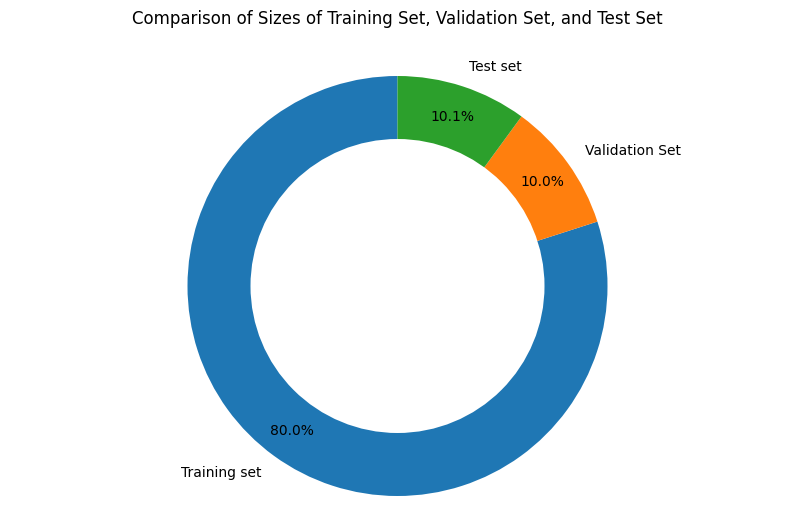

In [72]:
# Feature-target split
X = df['content']
y = df['intensity_enc']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 121)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 121)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Comparison of Sizes of Training Set, Validation Set, and Test Set', y=1.05)

# Show the plot
plt.show()

# 6.Define model evaluation

In [86]:
def evaluate_model(model, X_test, y_test, class_names, model_name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# 7.Model Selection and Training

# Logistic Regression


Logistic Regression Accuracy: 0.6625

Classification Report:
               precision    recall  f1-score   support

       happy       0.68      0.78      0.73        74
         sad       0.67      0.65      0.66        54
       angry       0.57      0.41      0.47        32

    accuracy                           0.66       160
   macro avg       0.64      0.61      0.62       160
weighted avg       0.66      0.66      0.65       160



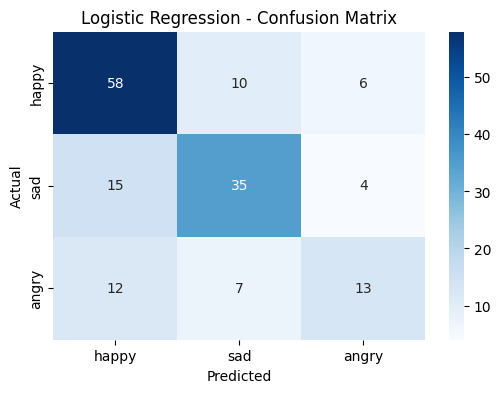

In [89]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selected, y_train)
evaluate_model(logreg, X_test_selected, y_test, class_names=['happy', 'sad', 'angry'], model_name="Logistic Regression")

# Random Forest


Random Forest Accuracy: 0.6750

Classification Report:
               precision    recall  f1-score   support

       happy       0.74      0.72      0.73        74
         sad       0.64      0.69      0.66        54
       angry       0.60      0.56      0.58        32

    accuracy                           0.68       160
   macro avg       0.66      0.65      0.66       160
weighted avg       0.68      0.68      0.67       160



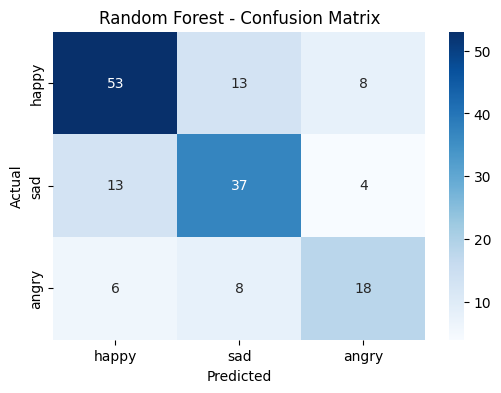

In [90]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)
evaluate_model(rf, X_test_selected, y_test, class_names=['happy', 'sad', 'angry'], model_name="Random Forest")


#  XGBoost Classifier



XGBoost Classifier Accuracy: 0.6312

Classification Report:
               precision    recall  f1-score   support

       happy       0.67      0.69      0.68        74
         sad       0.58      0.65      0.61        54
       angry       0.62      0.47      0.54        32

    accuracy                           0.63       160
   macro avg       0.63      0.60      0.61       160
weighted avg       0.63      0.63      0.63       160



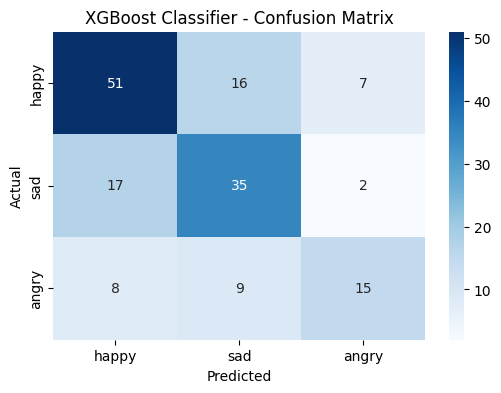

In [91]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_selected, y_train)
evaluate_model(xgb, X_test_selected, y_test, class_names=['happy', 'sad', 'angry'], model_name="XGBoost Classifier")


# 8.Hyperparameter Tuning

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Random Forest Accuracy: 0.6687

Classification Report:
               precision    recall  f1-score   support

       happy       0.73      0.70      0.72        74
         sad       0.63      0.69      0.65        54
       angry       0.60      0.56      0.58        32

    accuracy                           0.67       160
   macro avg       0.65      0.65      0.65       160
weighted avg       0.67      0.67      0.67       160



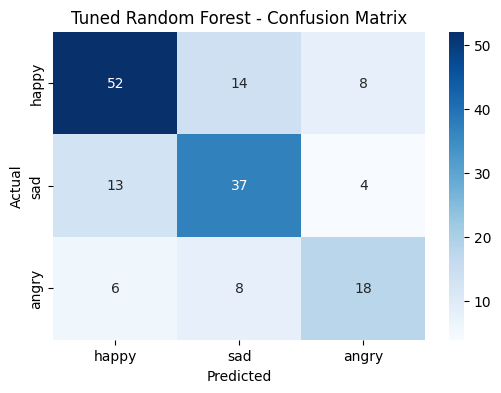

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV for exhaustive search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit to training data
grid_search.fit(X_train_selected, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate
evaluate_model(best_rf, X_test_selected, y_test, class_names, model_name="Tuned Random Forest")


In [94]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the feature selector (if used)
joblib.dump(selector, 'feature_selector.pkl')

# Save the best model
joblib.dump(best_rf, 'final_model.pkl')


['final_model.pkl']